## Introduction

The goal of this project is to learn the insights of Data analysis process and the very core part of data analysis is to Gather, Access and Clean data. Which is known as Data wrangling. I will be analyzing twitter account "WeRateDogs" tweet data to get insights and learn pattern involved in the data, by gathering from resources, accessing the required data and get informational data only and then cleaning the final data obtained to display my findings from data.

### Files used:

* Enhanced Twitter Archive
* Additoinal Data via the Twitter API
* Image Predictions File

### The Steps taken are mentioned as below:

1. Data Wrangling :
    * Gather Data
    * Assess Data
    * Clean Data
2. Store, analyze and visualize Data.
3. Reports for:
    * Data wrangle efforts
    * Data analysis and visualizations.

In [3]:
# Import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import os
import re
import requests
import time

from datetime import datetime
from functools import reduce

% matplotlib inline

## Step - Gather

In [6]:
# Load the enhanced twitter archive file we were given
archive_df = pd.read_csv('twitter-archive-enhanced-2.csv', encoding = 'utf-8')

#### Learning data

In [7]:
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [8]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Can be seen from above that lots of inconsistancies are there in data.

In [9]:
# Downloading the image prediction tsv file using the Requests library and the given URL

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Saving file
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
# Loading file into dataframe
predict_df = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

#### Learning data

In [10]:
predict_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [11]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [13]:
## step 1: Create a list to store the tweets from the json file

tweet_list = []

json_file = open('tweet-json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

## Step 2: Create a dataframe

tweet_df = pd.DataFrame()

## Step 3: Fill data into dataframe from extracted list.

tweet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_df['retweets'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_df['favorites'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweet_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweet_df['tweet'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

In [14]:
tweet_df.head()

,tweet_id,retweets,favorites,created_at,tweet
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


### Assessing Data

Now we will read data and find for data qualities and note down the points for `cleaning data`

### Quality:

**Missing Data**

   Tweet Archive Dataset
   name: `745` tweets that have None as a name
 
**Quality issues**

* name column: some names are false (O, a, not..)
* Source format is bad and can not be read easily.
* Missing values from images dataset (2075 rows instead of 2356).
* Some tweets have 2 different tweet_id, that is retweets.
* Rows where retweeted_status_id and retweeted_status_user_id have values NAN
* tweet_id is an integer, should be type object as no calculation is needed
* There are invalid names (a, an and less than 3 characters).
* created_at: not datetime format
* No use of in_reply_to_status_id, in_reply_to_user_id

### Tidiness:

* Dog stage is in 4 columns (doggo, floofer, pupper, puppo), no need for that, can be merged into one for one variable (dog stage)
* Merge the three datasets.
* Create seperate columns for date from time.
* Delete the text column and timestamp column
* Make source column in one word source rather than HTML
* Combine rating_numerator and rating_denominator into rating column

In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id      2354 non-null int64
retweets      2354 non-null int64
favorites     2354 non-null int64
created_at    2354 non-null object
tweet         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [16]:
archive_df.shape

(2356, 17)

In [17]:
tweet_df.shape

(2354, 5)

In [18]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Check if any null values in the data frame

In [19]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Check if any duplicated values in the data frame

In [20]:
archive_df['tweet_id'].duplicated().any()

False

In [21]:
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Names of dogs in data

In [22]:
np.sort(archive_df.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

### Issues :

* Some unusual names in the data frame, and luckily all are in lower case.

In [23]:
archive_df.loc[(archive_df['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


### Devices used to tweet

In [24]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Ratings counts

In [25]:
archive_df['rating_denominator'].value_counts(), archive_df['rating_numerator'].value_counts()

(10     2333
 11        3
 50        3
 80        2
 20        2
 2         1
 16        1
 40        1
 70        1
 15        1
 90        1
 110       1
 120       1
 130       1
 150       1
 170       1
 7         1
 0         1
 Name: rating_denominator, dtype: int64, 12      558
 11      464
 10      461
 13      351
 9       158
 8       102
 7        55
 14       54
 5        37
 6        32
 3        19
 4        17
 1         9
 2         9
 420       2
 0         2
 15        2
 75        2
 80        1
 20        1
 24        1
 26        1
 44        1
 50        1
 60        1
 165       1
 84        1
 88        1
 144       1
 182       1
 143       1
 666       1
 960       1
 1776      1
 17        1
 27        1
 45        1
 99        1
 121       1
 204       1
 Name: rating_numerator, dtype: int64)

### Name types of dogs

In [26]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Toby           7
Daisy          7
Bailey         7
Buddy          7
Scout          6
Oscar          6
Dave           6
Leo            6
Stanley        6
Milo           6
Jack           6
Jax            6
Koda           6
Rusty          6
Bella          6
Gus            5
            ... 
Nida           1
Tess           1
Tug            1
Fwed           1
Goliath        1
Mookie         1
Sephie         1
Ulysses        1
Kayla          1
Sailer         1
Gert           1
Chaz           1
Hazel          1
Doobert        1
Terrenth       1
Heinrich       1
Rover          1
DonDon         1
Vixen          1
Bronte         1
Kallie         1
Shikha         1
Enchilada      1
Jarod          1
O              1
Pippin         1
Kaia           1
Darla         

### Checking Doggo, pupper, puppo and floofer

In [27]:
archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
archive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
archive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [30]:
archive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
archive_df.loc[(archive_df['doggo']== 'doggo') & (archive_df['floofer']== 'floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


### Checking if any ratings using other than integer

In [32]:
archive_df[archive_df['text'].str.contains(r'(\d+\.\d+\/\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


# Dataset 2 - Image predictions

In [33]:
predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
predict_df.shape

(2075, 12)

### Check for any null values

In [36]:
predict_df.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
predict_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [38]:
predict_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [39]:
predict_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [40]:
predict_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [41]:
predict_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

# Predictions with confidence > 100

In [42]:
predict_df[predict_df.p1_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
predict_df[predict_df.p2_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [44]:
predict_df[predict_df.p3_conf > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Dataset 3 - Data from Twitter API

### Generated from JSON

In [45]:
tweet_df.head(3)

,tweet_id,retweets,favorites,created_at,tweet
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...


In [46]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id      2354 non-null int64
retweets      2354 non-null int64
favorites     2354 non-null int64
created_at    2354 non-null object
tweet         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [47]:
tweet_df.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [48]:
tweet_df['tweet_id'].duplicated().any()

False

In [49]:
tweet_df['tweet_id'].duplicated().sum()

0

# Cleaning

`Steps` 
* Define
* Code
* Test

## Creating copies of each Dataset

In [50]:
twitter_archive_clean = archive_df.copy()
predictions_clean = predict_df.copy()
twitter_clean = tweet_df.copy()

## Merging all three datasets into one df

### Define

Merge the 3 datasets using `INNER` join.

In [51]:
df = pd.merge(twitter_archive_clean, predictions_clean, how = 'inner', on = ['tweet_id'] )
df = pd.merge(df, twitter_clean, how = 'inner', on = ['tweet_id'])
df.to_csv('tweet_full.csv', encoding = 'utf-8')

In [52]:
df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,created_at,tweet
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.07611,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

### Creating a copy of merged data to work on

In [59]:
df_clean = df.copy()

**Define** 

Delete the following columns: 

`retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, timestam, text, in_reply_to_status_id, in_reply_to_user_id`

**Code**

In [60]:
list_of_col = ['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'timestamp',
            'text',
            'in_reply_to_status_id',
            'in_reply_to_user_id']

df_clean = df_clean.drop(list_of_col, 1)

**Test**

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2073 non-null int64
source                2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bo

**Define**

Change source column from whole Html text to more readable

**Code**

In [62]:
df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [63]:
df_clean['source'] = df_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

**Test**

In [64]:
df_clean['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

**Define**

* Change the value None in the column name to Null

**Code**

In [65]:
df_clean['name'] = df_clean['name'].replace('None', np.NaN)

**Test**

In [66]:
pd.isnull(df_clean.name).sum()

577

**Define**

Move doggo, floofer, pupper and puppo columns into one column dog_stage.

**Code**

In [67]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              2073 non-null int64
source                2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1496 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bo

In [68]:
# Create the new column 

df_clean['dog_stage'] = df_clean['tweet'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [69]:
df_clean.head(3)

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,created_at,tweet,dog_stage
0,892420643555336193,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,...,0.085851,False,banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,NaN
1,892177421306343426,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,...,0.090647,True,papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,NaN
2,891815181378084864,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,...,0.078253,True,kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,NaN


In [70]:
# Lists of stages more than one

pupper_list = df_clean.loc[(df_clean.doggo == "doggo") & (df_clean.pupper == "pupper")]['tweet_id'].tolist()
floofer_list = df_clean.loc[(df_clean.doggo == "doggo") & (df_clean.floofer == "floofer")]['tweet_id'].tolist()
puppo_list = df_clean.loc[(df_clean.doggo == "doggo") & (df_clean.puppo == "puppo")]['tweet_id'].tolist()

In [71]:
# update the dog stage
for twt in pupper_list:
    df_clean.loc[df_clean.tweet_id == twt,'dog_stage'] = 'doggo, pupper'
    
for twt in floofer_list:
    df_clean.loc[df_clean.tweet_id == twt,'dog_stage'] = 'doggo, floofer'
    
for twt in puppo_list:
    df_clean.loc[df_clean.tweet_id == twt,'dog_stage'] = 'doggo, puppo'

**Test**

In [72]:
df_clean.dog_stage.value_counts()

pupper            227
doggo              66
puppo              28
doggo, pupper      11
floofer             3
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

**Define**
 
* Dropping the columns doggo, floofer, puppo

**Code**

In [73]:
# Delete the original stage columns

list_of_cols = ['doggo', 
            'floofer', 
            'pupper', 
            'puppo']

df_clean = df_clean.drop(list_of_cols, 1)

**Test**

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 22 columns):
tweet_id              2073 non-null int64
source                2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1496 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool
retweets              2073 non-null int64
favorites             2073 non-null int64
created_at            2073 non-null object
tweet                 2073 non-null object

**Define**

Delete image prediction columns

**Code**

In [75]:
df_clean.columns

Index(['tweet_id', 'source', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweets', 'favorites', 'created_at', 'tweet', 'dog_stage'],
      dtype='object')

In [76]:
predictions = []
confidence_level = []

def prediction_func(dataframe):
    if dataframe['p1_dog'] == True:
        predictions.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predictions.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predictions.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        predictions.append('NaN')
        confidence_level.append(0)

In [77]:
df_clean.apply(prediction_func, axis=1)

df_clean['prediction'] = predictions
df_clean['confidence_level'] = confidence_level

**Test**

In [78]:
df_clean.sample()

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p3,p3_conf,p3_dog,retweets,favorites,created_at,tweet,dog_stage,prediction,confidence_level
1331,687317306314240000,Twitter for iPhone,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,Shih-Tzu,0.747208,...,Lhasa,0.035788,True,10411,22073,Wed Jan 13 16:56:30 +0000 2016,This is Tyrone. He's a leaf wizard. Self-motiv...,NaN,Shih-Tzu,0.747208


#### Define

Creating the rating columns to get ratio

**Code**

In [79]:
df_clean['rating'] = df_clean['rating_numerator'].astype(float)/df_clean['rating_denominator']


**Test**

In [80]:
df_clean['rating'].value_counts()

1.200000      477
1.000000      431
1.100000      419
1.300000      283
0.900000      151
0.800000       95
0.700000       51
1.400000       40
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.818182        1
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
1.500000        1
Name: rating, dtype: int64

In [81]:
df_clean.columns

Index(['tweet_id', 'source', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweets', 'favorites', 'created_at', 'tweet', 'dog_stage',
       'prediction', 'confidence_level', 'rating'],
      dtype='object')

In [82]:
df_clean.head(2)

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p3_conf,p3_dog,retweets,favorites,created_at,tweet,dog_stage,prediction,confidence_level,rating
0,892420643555336193,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,...,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,0.000000,1.3
1,892177421306343426,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,NaN,Chihuahua,0.323581,1.3


#### Define

Sort the columns

**Code**

In [83]:
# Create a list to re-sort the dataframe columns
sorted_list = ['tweet_id','tweet','name','dog_stage','rating','created_at','retweets', 'favorites',
 'source','rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','expanded_urls', 'jpg_url']

df_clean = df_clean[sorted_list]

In [84]:
df_clean.head(2)

,tweet_id,tweet,name,dog_stage,rating,created_at,retweets,favorites,source,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,Tue Aug 01 16:23:56 +0000 2017,8853,39467,Twitter for iPhone,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,Tue Aug 01 00:17:27 +0000 2017,6514,33819,Twitter for iPhone,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg


**Define**

Convert the type of tweet_id to string.

**Code**

In [85]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')

**Test**

In [76]:
df_clean['tweet_id'].dtype

dtype('O')

# Store Data

In [86]:
df_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

# Analyzing and Visualizing Data

In [87]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,tweet,name,dog_stage,rating,created_at,retweets,favorites,source,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,Tue Aug 01 16:23:56 +0000 2017,8853,39467,Twitter for iPhone,13,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,Tue Aug 01 00:17:27 +0000 2017,6514,33819,Twitter for iPhone,13,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              2073 non-null int64
tweet                 2073 non-null object
name                  1496 non-null object
dog_stage             337 non-null object
rating                2073 non-null float64
created_at            2073 non-null object
retweets              2073 non-null int64
favorites             2073 non-null int64
source                2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bool

In [89]:
df.describe()

,tweet_id,rating,retweets,favorites,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,7.383634e+17,1.169987,2976.089243,8556.718283,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02
std,6.780118e+16,3.988880,5054.897526,12098.640994,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02
min,6.660209e+17,0.000000,16.000000,0.000000,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764706e+17,1.000000,634.000000,1674.000000,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02
50%,7.119681e+17,1.100000,1408.000000,3864.000000,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02
75%,7.931959e+17,1.200000,3443.000000,10937.000000,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02
max,8.924206e+17,177.600000,79515.000000,132810.000000,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [90]:
# Convert columns to their appropriate types and set the timestamp as an index

df['tweet_id'] = df['tweet_id'].astype(object)
df['created_at'] = pd.to_datetime(df.created_at)
df['source'] = df['source'].astype('category')
df['dog_stage'] = df['dog_stage'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              2073 non-null object
tweet                 2073 non-null object
name                  1496 non-null object
dog_stage             337 non-null category
rating                2073 non-null float64
created_at            2073 non-null datetime64[ns]
retweets              2073 non-null int64
favorites             2073 non-null int64
source                2073 non-null category
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 

In [91]:
df.head(1)

,tweet_id,tweet,name,dog_stage,rating,created_at,retweets,favorites,source,rating_numerator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,2017-08-01 16:23:56,8853,39467,Twitter for iPhone,13,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


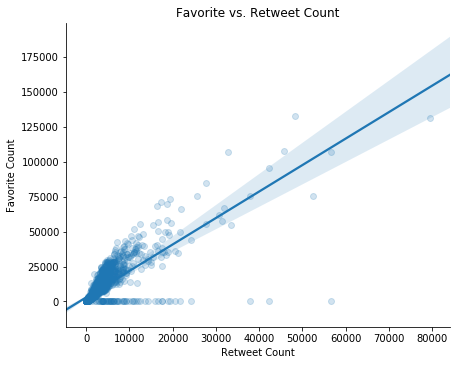

In [92]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweets", 
           y="favorites", 
           data=df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

* Favorite and retweet counts are highly positively correlated. 

* For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

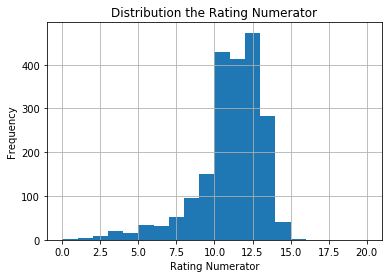

In [93]:
df.hist(column='rating_numerator', bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution the Rating Numerator')
plt.savefig('rating_numerator_dist');

# Most Common Dog ?

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "left center". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


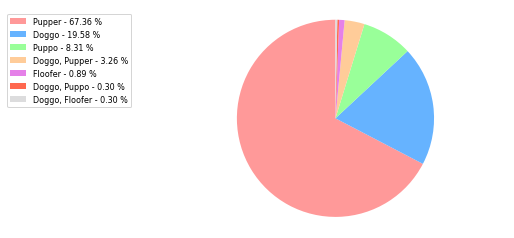

In [94]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 


plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

# Most used source to tweet

In [95]:
df['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

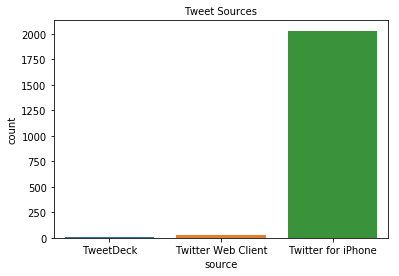

In [96]:
sns.countplot(data=df, x='source')
plt.title('Tweet Sources', size=10)
plt.savefig('most_used_twitter_source');

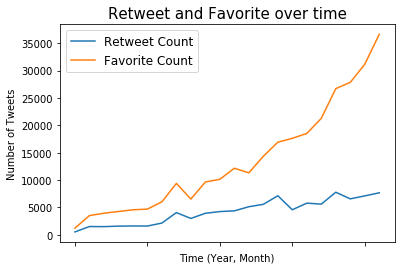

In [97]:
df.retweets.groupby([df['created_at'].dt.year, df['created_at'].dt.month]).mean().plot('line')
df.favorites.groupby([df['created_at'].dt.year, df['created_at'].dt.month]).mean().plot('line')
plt.title('Retweet and Favorite over time', size =15)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=12)
plt.savefig('ret_fav');

Favourites are far more than retweets. 
Both, favorites and retweets, increased over the time. While the favorite count increases strongly with the number of tweets, the retweet count seems almost indepedent of the number of tweets.

## Co relation of vairiables

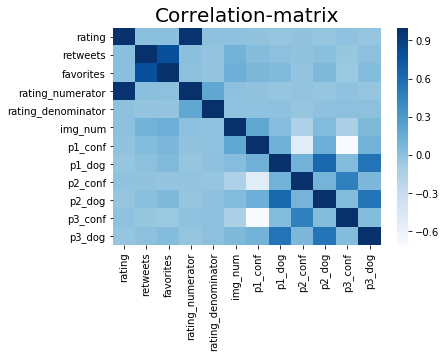

In [98]:
sns.heatmap(df.corr(), cmap="Blues")
plt.title('Correlation-matrix', size=20)
plt.savefig('heatmap');